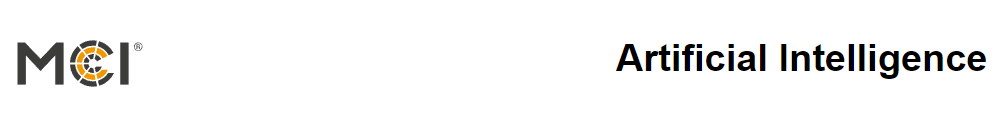

---

# 02 a Polynomial Regression

-----
## 1. Polynom vs. Linear Regression

In many cases the data we want to fit with a regression is not coming from a linear relation. Most of the time the is a nonlinear relation we have to fit. Therefore, a linear regression is not optimal or reasonable to use. Let's dip into the topic of polynomial regressions or model based regressions. As always we want a connection either to medical or sports technologies. Therefore the given example is chosen from these fields.

### 1.1. The Problem & Data Aquisition

In American football the passes has the burden to do a lot of passes troughout a training. To rest the passer as good as possible, passing machines are common in American football that replace the passer for various parts of the training. A given passing machine (developed at MCI) can throw passes and has two possible parameter to impact the passes trajectory. One parameter is the spin of the flywheels, the second parameter is the releaseangle of the machine. For a given set of parameter, the pass approximately travels along a quadratic trajectory. This section is about how the trajectory was recorded and how we can prepare the data for fitting. First we import the relevant libraries and packages for this task.

In [1]:
# relevant import for dataimport and handling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 120 # we do this to get bigger plots

As a next step we load the data from a given experiment. The experiment was made in 2020 at MCI and can be seen in detail under the following [link](https://www.mdpi.com/2504-3900/49/1/94). The results and conclusions of the experiment can be seen under [link](https://journals.sagepub.com/doi/10.1177/1754337120975225). Within the experiment it was the goal to track the trajectory of an American football, that was thrown by the passing machine through the big entrance hall at MCI IV. To have a better impression howe the experiment was carried out you can see the experimental setup below:
<div>
<img src="https://mdpi-res.com/proceedings/proceedings-49-00094/article_deploy/html/images/proceedings-49-00094-g002.png" width="500"/>
</div>

In the file mytrajectories.npy, that is available on sakai, all the data of this experiment is stored and can be imported. This is what we do in the next step. Within the step we also choose one of the trajectories for a specific set of parameter. Again, the parameter we have to impact the trajecory are $n$ as spin of the flywheels and $\phi$ as release angle.

Depending on your IDE you have to adapt the import to your needs! 

In [4]:
arr=np.load("../Data/American_Football_Trajectories/mytrajectories.npy",allow_pickle=True) # adapt the path to your needs
arr.shape
angle=arr[:,0] # release angle of the flywheels (phi)
pos_x=arr[:,1] # current x position of the American football
pos_z=arr[:,2] # current z position of the American football
n=arr[:,3]     # release spin rate of the flywheels

filter_angle=30 # in degree
filter_n=700    # in rpm

filter_to_choose=np.logical_and(arr[:,0]==filter_angle,arr[:,3]==filter_n)

chosen_angle=arr[filter_to_choose,0] # release angle of the flywheels
chosen_pos_x=arr[filter_to_choose,1] # current x position of the American football
chosen_pos_z=arr[filter_to_choose,2] # current z position of the American football
chosen_n=arr[filter_to_choose,3]     # release spin rate of the flywheels

chosen_pos_x=chosen_pos_x[:,np.newaxis] # prepare for fitting
chosen_pos_z=chosen_pos_z[:,np.newaxis] # prepare for fitting

To make things easier to grasp, all trajectories are plotted below.

Text(0, 0.5, 'z / m')

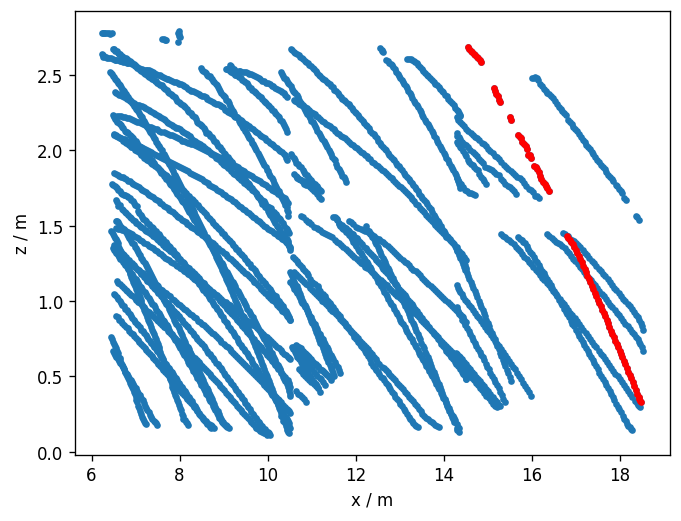

In [5]:
plt.plot(pos_x,pos_z,'.') # plot all the trajectories
plt.plot(chosen_pos_x,chosen_pos_z,'r.') # plot the one we have chosen
plt.xlabel('x / m')
plt.ylabel('z / m')

### 1.2. Process and Analyze Data

Choosing the trajectory could be done randomly. For simplicity the trajectory we chose $n$ to 700 revolutions per minute and the release angle to 30°

Now it is time to do the next step, which would be to process the given data to be able to analyze it. We would like to fit the trajectories plotted above. To do so, we need a polynomial function, with adjustable parameter. The polynomial function we want to use is given here as:

$z=p_0 + x \cdot p_1 + x^2 \cdot p_2 + x^3 \cdot p_3\cdots$

$p_0$...can be seen as an offset value or the hight which the trajectory started (and the pass was initially thrown)

$p_i$...can be seen as factor of $i^{th}$ power that relats x to z

For simplicity we start again with a linear fit. That means, we only have to take into account $p_0$ and $p_1$. This time, we do not use our own algorithms but we use a library called scikit learn. Let's download and import the relevant things for our given task.

In [6]:
#relevant installations and imports for fitting
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# lets calculate cost of final solution
# new definition of loss function (to work only with predictions)
def loss2(predict,groundtruth):
    # MEAN SQUARED ERROR
    prediction=predict
    y=groundtruth
    loss = np.sum((prediction-y)**2)/len(y)
    return loss

We have defined and imported all relevant code for our fitting. In the cell below we check, if the data we want to fit has the right shape.

In [7]:
print(chosen_pos_x.shape)
print(chosen_pos_z.shape)

(92, 1)
(92, 1)


Now it is possible for us to create a polynomial fit. Remember, in our first step we want to do a linear fit.

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
MSE is: 0.0015756460788052176


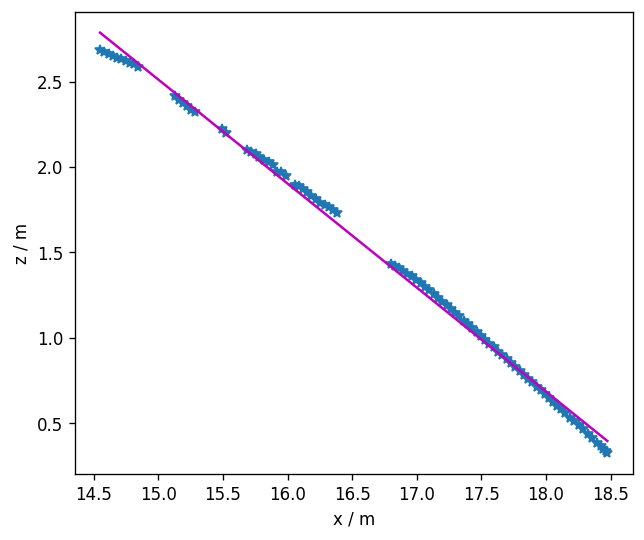

In [8]:
polynomial_features= PolynomialFeatures(degree=1) # for a linear fit we have a degree of 1
chosen_pos_x_polynom = polynomial_features.fit_transform(chosen_pos_x) # here we prepare the x-vector for the polynomfit

# here you can see, that the fit_transform() function just computes all the relevant orders of the x-vector.
# You can also see this for degrees higher than 1
print(chosen_pos_x_polynom[0:10,0:-1]) # this line shows you the first 10 values of each coloumn of the polynom fit vector/matrix

# Now we do the linear Regression
model = LinearRegression()
model.fit(chosen_pos_x_polynom, chosen_pos_z)

# With our regression model we now do the prediction.
z_linar_pred = model.predict(chosen_pos_x_polynom)

# here we calculate the MSE loss for the fit
mse = loss2(z_linar_pred,chosen_pos_z)
print("MSE is:",mse)

plt.figure(figsize=(6, 5))
plt.plot(chosen_pos_x, chosen_pos_z,'*')
# sort the values of x before line plot
# this would be necessary if the values are not in the right order and we have lines between the coordinates in the plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(chosen_pos_x,z_linar_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel('x / m')
plt.ylabel('z / m')
plt.show()

#### TASK: Redo the fit, but now use higher polynom order

Use the cell below to redo the fit, but change the order at least to the values 2, 3, 10. Compare the MSE for the various fits and discuss the outcome

In [9]:
# Your code goes here

If you have managed the task on your own. Congratulations! Below you can find one possible solution to the task.

(92, 10)
(92, 1)
MSE with fit of order 1 is: 0.0015756460788052176
MSE with fit of order 2 is: 7.053862466791152e-05
MSE with fit of order 3 is: 7.048007954053761e-05
MSE with fit of order 4 is: 7.048006814089466e-05
MSE with fit of order 5 is: 6.690228617508755e-05
MSE with fit of order 6 is: 6.733408638618724e-05
MSE with fit of order 7 is: 6.146510515535543e-05
MSE with fit of order 8 is: 6.255907185932388e-05
MSE with fit of order 9 is: 6.357113273044634e-05
MSE with fit of order 10 is: 6.44924771310288e-05


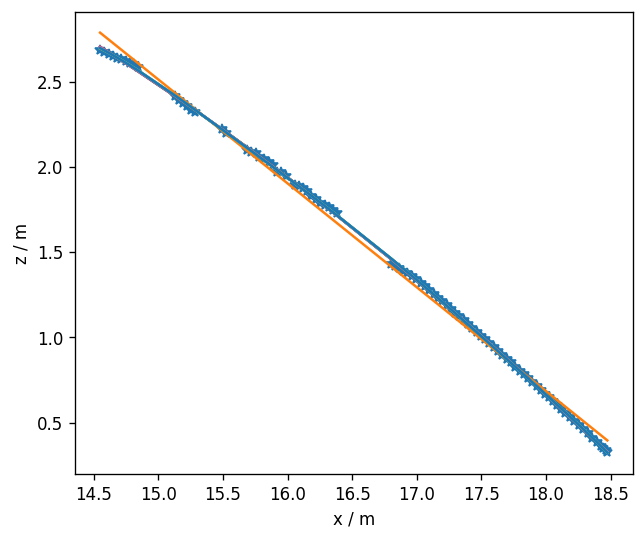

In [10]:
degree_we_want_to_fit=np.array([1,2,3,4,5,6,7,8,9,10])

#predefine the outputs
z_linar_pred=np.zeros((len(chosen_pos_z),len(degree_we_want_to_fit)))
mse=np.zeros((1,len(degree_we_want_to_fit)))
print(z_linar_pred.shape)
print(chosen_pos_x.shape)

plt.figure(figsize=(6, 5))
plt.plot(chosen_pos_x, chosen_pos_z,'*')
plt.xlabel('x / m')
plt.ylabel('z / m')

for index in range(len(degree_we_want_to_fit)):
    polynomial_features= PolynomialFeatures(degree=degree_we_want_to_fit[index]) # for a linear fit we have a degree of 1
    chosen_pos_x_polynom = polynomial_features.fit_transform(chosen_pos_x) # here we prepare the x-vector for the polynomfit

    # Now we do the linear Regression
    model = LinearRegression()
    model.fit(chosen_pos_x_polynom, chosen_pos_z)

    # With our regression model we now do the prediction.
    z_linar_pred[:,index:(index+1)] = model.predict(chosen_pos_x_polynom)

    # here we calculate the MSE loss for the fit
    mse[0,index] = loss2(z_linar_pred[:,index:(index+1)],chosen_pos_z)
    print("MSE with fit of order", degree_we_want_to_fit[index] ,"is:",mse[0,index])

    plt.plot(chosen_pos_x, z_linar_pred[:,index:(index+1)])

plt.show()

Text(0, 0.5, 'MSE')

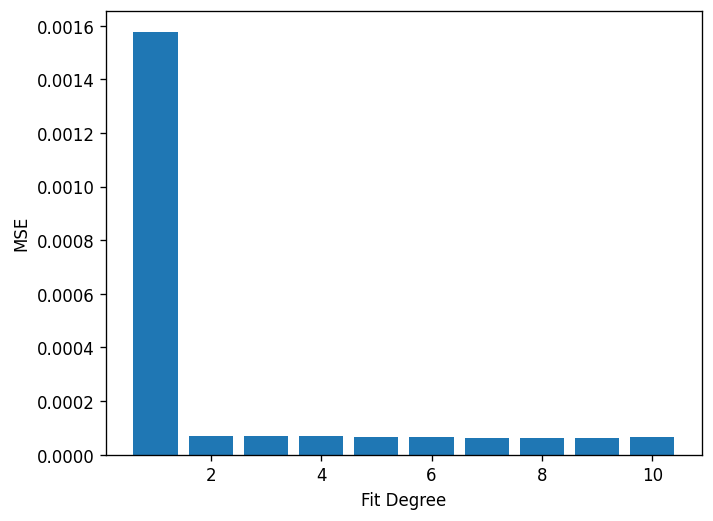

In [11]:
fig, ax = plt.subplots()
ax.bar(degree_we_want_to_fit.flatten(), mse.flatten(), label=degree_we_want_to_fit.flatten())
plt.xlabel('Fit Degree')
plt.ylabel('MSE')

### 1.3. Overfitting

As can be seen above, increasing the degree of the polynomial fit is not necessarily beneficial for the fit. At some point the fit starts to model the measurment noise instead of the fundamental principle behind the relation. This is also true for every machine learning task. Overfitting can happen if your model has too many parameter to adjust for a too small amount of data. Therefore, whenever you have data, make sure to use the appropriate number of trainable parameter, otherwise you may overfit the data, and the generalization (perfromance of the prediction on never seen data) will not be good. 
